In [11]:
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import country_converter as coco
import pypsa

import cartopy
import cartopy.crs as ccrs

In [2]:
import cartopy.feature as cfeature

In [5]:
n1=pypsa.Network(r"./elec_s_256_lv1.25__Co2L0p29-6H-T-H-B-I-A-solar+p3-dist1_2030.nc")

INFO:pypsa.io:Imported network elec_s_256_lv1.25__Co2L0p29-6H-T-H-B-I-A-solar+p3-dist1_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [7]:
soc1 = n1.stores_t.e.filter(regex='^DE.*H2 Store$').sum(axis=1)
soc1.index = pd.to_datetime(soc1.index)
soc1.index = soc1.index.map(lambda dt: dt.replace(year=2030))
pct1 = soc1/(9438.866304)*100
pct1


snapshot
2030-01-01 00:00:00    99.818493
2030-01-01 06:00:00    90.263823
2030-01-01 12:00:00     0.062005
2030-01-01 18:00:00    44.930882
2030-01-02 00:00:00    96.527628
                         ...    
2030-12-30 18:00:00    45.640038
2030-12-31 00:00:00    87.839021
2030-12-31 06:00:00    59.653469
2030-12-31 12:00:00    21.894471
2030-12-31 18:00:00    56.020414
Length: 1460, dtype: float64

In [6]:
soc1.describe()

count    1460.000000
mean     4933.998413
std      3314.003645
min         0.000549
25%      1834.598973
50%      5053.522763
75%      8141.072598
max      9438.866304
dtype: float64

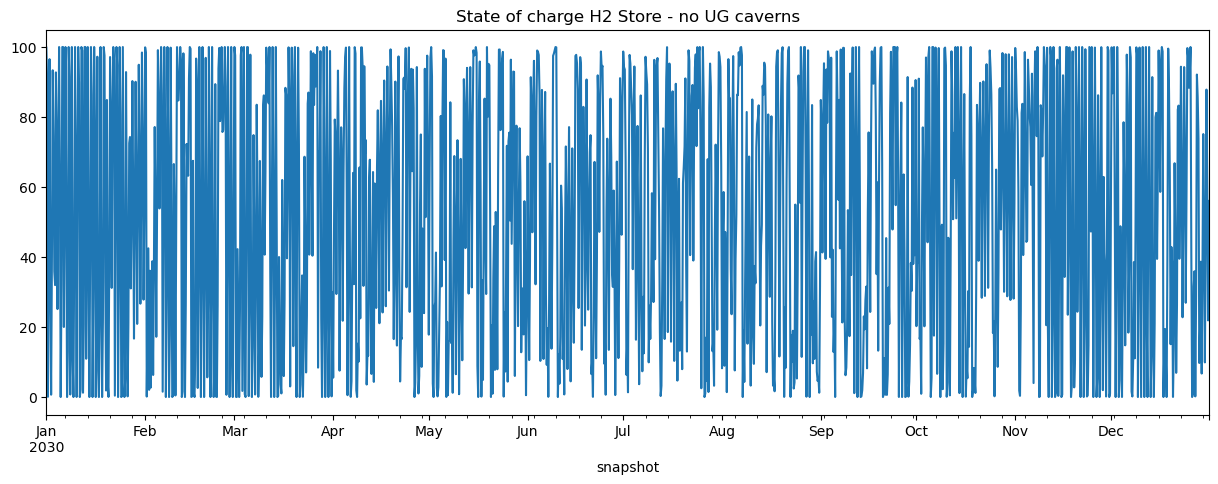

In [8]:
plt.figure(figsize=(15,5))
pct1.plot()
plt.title('State of charge H2 Store - no UG caverns')
plt.show()

In [11]:
soc1_bat = n1.stores_t.e.filter(regex='^DE.*battery$').sum(axis=1)
soc1_bat.index = pd.to_datetime(soc1_bat.index)
soc1_bat.index = soc1_bat.index.map(lambda dt: dt.replace(year=2030))
pct1_bat = soc1_bat/(4188.445761)*100
pct1_bat = pct1_bat.to_frame(name="no UG")
pct1_bat

no UG
snapshot                      
2030-01-01 00:00:00  84.238737
2030-01-01 06:00:00  99.982232
2030-01-01 12:00:00  99.738058
2030-01-01 18:00:00  51.390024
2030-01-02 00:00:00   2.594885
...                        ...
2030-12-30 18:00:00  47.577138
2030-12-31 00:00:00  72.014385
2030-12-31 06:00:00  41.941934
2030-12-31 12:00:00  16.414569
2030-12-31 18:00:00  36.038530

[1460 rows x 1 columns]

In [10]:
soc1_bat.describe()

count    1460.000000
mean     2168.397913
std      1455.070187
min         0.010323
25%       787.694395
50%      2167.227341
75%      3601.059148
max      4188.445761
dtype: float64

In [16]:
soc1_wtanks = n1.stores_t.e.filter(regex='^DE.*water tanks$').sum(axis=1)
soc1_wtanks.index = pd.to_datetime(soc1_wtanks.index)
soc1_wtanks.index = soc1_wtanks.index.map(lambda dt: dt.replace(year=2030))
pct1_wtanks = soc1_wtanks/(2.391334e+06)*100
pct1_wtanks = pct1_wtanks.to_frame(name="no UG")
pct1_wtanks

no UG
snapshot                      
2030-01-01 00:00:00  10.445079
2030-01-01 06:00:00   9.719646
2030-01-01 12:00:00   9.141337
2030-01-01 18:00:00   9.115251
2030-01-02 00:00:00   8.526774
...                        ...
2030-12-30 18:00:00  11.230183
2030-12-31 00:00:00  11.266038
2030-12-31 06:00:00  10.235955
2030-12-31 12:00:00   9.687828
2030-12-31 18:00:00   9.723061

[1460 rows x 1 columns]

In [15]:
soc1_wtanks.describe()

count    1.460000e+03
mean     7.633431e+05
std      5.980696e+05
min      6.113559e+02
25%      2.553682e+05
50%      6.403645e+05
75%      1.183058e+06
max      2.391334e+06
dtype: float64

In [42]:
soc2_co2_stored = n2.stores_t.e.filter(regex='co2 stored$').sum(axis=1)
soc2_co2_stored.index = pd.to_datetime(soc2_co2_stored.index)
soc2_co2_stored.index = soc2_co2_stored.index.map(lambda dt: dt.replace(year=2030))
pct2_co2_stored = soc2_co2_stored/(2.000000e+08)*100
pct2_co2_stored = pct2_co2_stored.to_frame(name="default")
pct2_co2_stored

default
snapshot                       
2030-01-01 00:00:00    0.064564
2030-01-01 06:00:00    0.130228
2030-01-01 12:00:00    0.196064
2030-01-01 18:00:00    0.261403
2030-01-02 00:00:00    0.327981
...                         ...
2030-12-30 18:00:00   99.740869
2030-12-31 00:00:00   99.804838
2030-12-31 06:00:00   99.870075
2030-12-31 12:00:00   99.935434
2030-12-31 18:00:00  100.000000

[1460 rows x 1 columns]

In [41]:
soc2_co2_stored.describe()

count    1.460000e+03
mean     1.010326e+08
std      5.743397e+07
min      1.291289e+05
25%      5.221811e+07
50%      1.009136e+08
75%      1.509014e+08
max      2.000000e+08
dtype: float64

In [47]:
soc2_home_battery = n2.stores_t.e.filter(regex='^DE.*home battery$').sum(axis=1)
soc2_home_battery.index = pd.to_datetime(soc2_home_battery.index)
soc2_home_battery.index = soc2_home_battery.index.map(lambda dt: dt.replace(year=2030))
pct2_home_battery = soc2_home_battery/(0.423398)*100
pct2_home_battery = pct2_home_battery.to_frame(name="default")
pct2_home_battery

default
snapshot                      
2030-01-01 00:00:00  54.112033
2030-01-01 06:00:00  73.451558
2030-01-01 12:00:00  76.777237
2030-01-01 18:00:00  57.072619
2030-01-02 00:00:00  29.222070
...                        ...
2030-12-30 18:00:00  43.735985
2030-12-31 00:00:00  32.467101
2030-12-31 06:00:00  27.011427
2030-12-31 12:00:00  48.685380
2030-12-31 18:00:00  26.664620

[1460 rows x 1 columns]

In [46]:
pct2_home_battery.to_csv(r"D:\FhG IEG\pct2_home_battery.csv")

In [44]:
soc2_home_battery.describe()

count    1460.000000
mean        0.216905
std         0.112914
min         0.005509
25%         0.146989
50%         0.212000
75%         0.297083
max         0.423398
dtype: float64

In [18]:
def plot_dispatch(n, time):
    
    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    p_by_carrier_modified = p_by_carrier.copy()

    # Sum columns that start with "offwind"
    offwind_cols = [col for col in p_by_carrier.columns if col.startswith('offwind')]
    p_by_carrier_modified['offwind'] = p_by_carrier[offwind_cols].sum(axis=1)

    # Sum columns that end with "solar thermal"
    solar_thermal_cols = [col for col in p_by_carrier.columns if col.endswith('solar thermal')]
    p_by_carrier_modified['solar thermal'] = p_by_carrier[solar_thermal_cols].sum(axis=1)

    # Drop the original "offwind" and "solar thermal" columns
    p_by_carrier_modified.drop(columns=offwind_cols + solar_thermal_cols, inplace=True)
    p_by_carrier_modified.index = pd.to_datetime(p_by_carrier_modified.index)
    p_by_carrier_modified.index = p_by_carrier_modified.index.map(lambda dt: dt.replace(year=2030))
    
    if not n.stores.empty:
        sto = n.stores_t.p.groupby(n.stores.carrier, axis=1).sum().div(1e3)
        sto_modified = sto.copy()

        # Sum columns that end with "water tanks"
        water_tanks_cols = [col for col in sto.columns if col.endswith('water tanks')]
        sto_modified['water tanks'] = sto[water_tanks_cols].sum(axis=1)

        # Drop the original "water tanks" columns
        sto_modified.drop(columns=water_tanks_cols, inplace=True)

        sto_modified = sto_modified.rename(columns={"battery storage":"EV battery"})
        sto_modified.index = pd.to_datetime(sto_modified.index)
        sto_modified.index = sto_modified.index.map(lambda dt: dt.replace(year=2030))

        p_by_carrier_modified = pd.concat([p_by_carrier_modified, sto_modified], axis=1)
    
    fig, ax = plt.subplots(figsize=(15, 8))

    color = {
        "battery": "#ace37f",
        "EV battery": '#ace37f', 
        "H2 Store": '#bf13a0',
        "biogas": '#e3d37d',
        "co2": '#f29dae',
        "co2 stored": '#f2385a',
        "home battery": '#80c944',
        "oil": '#c9c9c9',
        "solid biomass": '#baa741',
        "gas": '#e05b09',
        "water tanks": '#e69487',
        "methanol": '#468c8b',

        "solar": '#f9d002',
        "solar rooftop": '#ffea80', 
        "onwind": '#235ebc',
        "offwind": '#6895dd',
        "ror": '#3dbfb0',
        "solar thermal": '#ffbf2b',

           
    }
    
    
    
    p_by_carrier_modified.where(p_by_carrier_modified>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=color,
    )
    
    charge = p_by_carrier_modified.where(p_by_carrier_modified<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=charge.columns.map(n.carriers.color),
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k')

    plt.legend(loc=(1.05,0))
    ax.set_ylabel("GW")
    ax.set_ylim(-10, 20)

C:\Users\phamt\AppData\Local\Temp\ipykernel_8612\3706501599.py:3: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\phamt\AppData\Local\Temp\ipykernel_8612\3706501599.py:20: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



ValueError: Invalid color nan

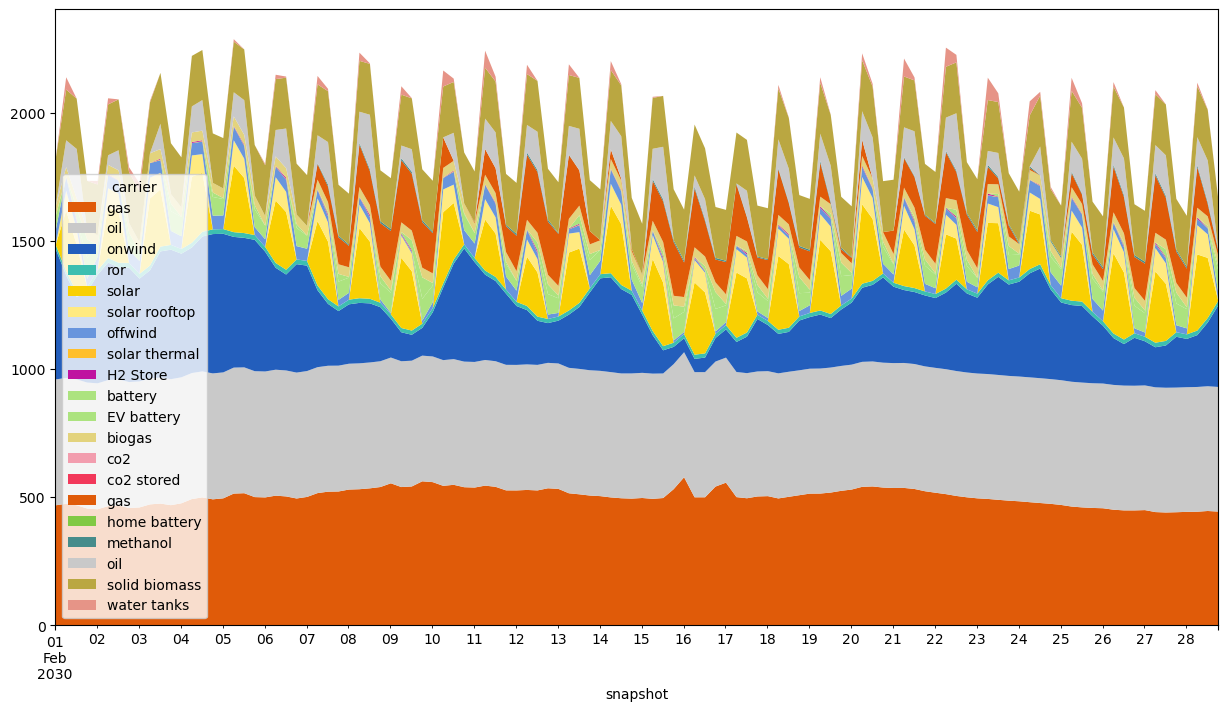

In [21]:
plot_dispatch(n1, time="2030-02")

In [64]:
def plot_dispatch(n, time):
    
    #p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3) # in Europe
    p_by_carrier = n.generators_t.p.filter(regex='^DE').groupby(n.generators.carrier, axis=1).sum().div(1e3) # in Germany

    p_by_carrier_modified = p_by_carrier.copy()

    # Sum columns that start with "offwind"
    offwind_cols = [col for col in p_by_carrier.columns if col.startswith('offwind')]
    p_by_carrier_modified['offwind'] = p_by_carrier[offwind_cols].sum(axis=1)

    # Sum columns that end with "solar thermal"
    solar_thermal_cols = [col for col in p_by_carrier.columns if col.endswith('solar thermal')]
    p_by_carrier_modified['solar thermal'] = p_by_carrier[solar_thermal_cols].sum(axis=1)

    # Drop the original "offwind" and "solar thermal" columns
    p_by_carrier_modified.drop(columns=offwind_cols + solar_thermal_cols, inplace=True)
    p_by_carrier_modified.index = pd.to_datetime(p_by_carrier_modified.index)
    p_by_carrier_modified.index = p_by_carrier_modified.index.map(lambda dt: dt.replace(year=2030))
    
    if not n.stores.empty:
        #sto = n.stores_t.p.groupby(n.stores.carrier, axis=1).sum().div(1e3) # in Europe
        sto = n.stores_t.p.filter(regex='^DE').groupby(n.stores.carrier, axis=1).sum().div(1e3) # in Germany

        sto_modified = sto.copy()

        # Sum columns that end with "water tanks"
        water_tanks_cols = [col for col in sto.columns if col.endswith('water tanks')]
        sto_modified['water tanks'] = sto[water_tanks_cols].sum(axis=1)

        # Drop the original "water tanks" columns
        sto_modified.drop(columns=water_tanks_cols, inplace=True)

        sto_modified = sto_modified.rename(columns={"battery storage":"EV battery"})
        sto_modified.index = pd.to_datetime(sto_modified.index)
        sto_modified.index = sto_modified.index.map(lambda dt: dt.replace(year=2030))

        p_by_carrier_modified = pd.concat([p_by_carrier_modified, sto_modified], axis=1)
    
    fig, ax = plt.subplots(figsize=(15, 8))

    color = {
        "battery": "#ace37f",
        "EV battery": '#ace37f', 
        "H2 Store": '#bf13a0',
        "biogas": '#e3d37d',
        "co2": '#f29dae',
        "co2 stored": '#f2385a',
        "home battery": '#80c944',
        "oil": '#c9c9c9',
        "solid biomass": '#baa741',
        "gas": '#e05b09',
        "water tanks": '#e69487',
        "methanol": '#468c8b',

        "solar": '#f9d002',
        "solar rooftop": '#ffea80', 
        "onwind": '#235ebc',
        "offwind": '#6895dd',
        "ror": '#3dbfb0',
        "solar thermal": '#ffbf2b',

           
    }
    
    
    
    p_by_carrier_modified.where(p_by_carrier_modified>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=color,
    )
    
    charge = p_by_carrier_modified.where(p_by_carrier_modified<0).dropna(how='all', axis=1).loc[time]
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=charge.columns.map(n.carriers.color),
        )
    
    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1), ncol=2)

    plt.legend(loc=(1.05,0))
    ax.set_ylabel("GW")
    ax.set_ylim(-10, 20)

C:\Users\phamt\AppData\Local\Temp\ipykernel_10544\1669409526.py:4: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\phamt\AppData\Local\Temp\ipykernel_10544\1669409526.py:23: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



ValueError: Invalid color nan

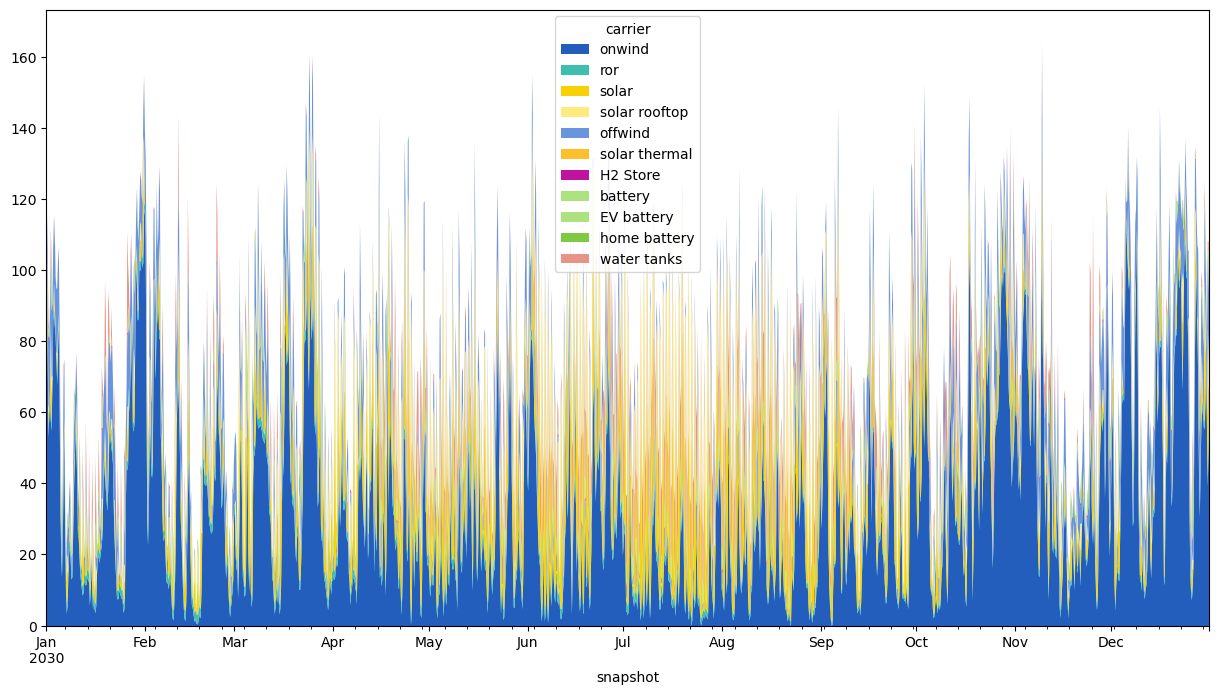

In [4]:
plot_dispatch(n1, time="2030")

/var/folders/2b/17ddx8s13fb7jb4wkn0p31b80000gn/T/ipykernel_9162/1669409526.py:4: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

/var/folders/2b/17ddx8s13fb7jb4wkn0p31b80000gn/T/ipykernel_9162/1669409526.py:23: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



ValueError: Invalid color nan

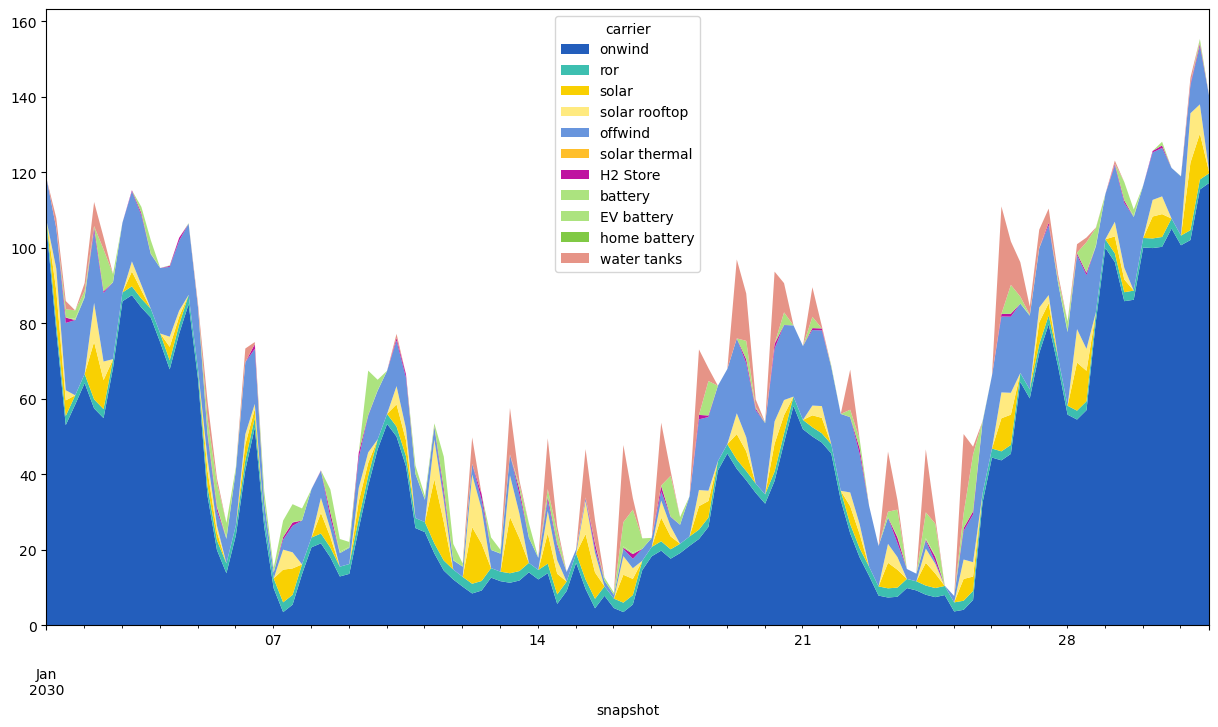

In [65]:
plot_dispatch(n1, time="2030-01")

In [12]:
wind2=n1.generators_t.p.filter(like='wind').filter(like="DE").div(1e3).sum(axis=1)
solar2=n1.generators_t.p.filter(like='solar').filter(like="DE").div(1e3).sum(axis=1)
ror2=n1.generators_t.p.filter(like='ror').filter(like="DE").div(1e3).sum(axis=1)

load2=n1.loads_t.p_set.filter(like="DE").div(1e3).sum(axis=1)
h2_demand2=n1.loads_t.p.filter(like="H2").filter(like="DE").div(1e3).sum(axis=1)
h2_supply2=n1.links_t.p1.filter(like="H2").filter(like="DE").div(1e3).sum(axis=1)

h2_dispatch2=n1.stores_t.p.filter(like="H2").filter(like="DE").div(1e3).sum(axis=1)
h2_store_level2=n1.stores_t.e.filter(like="H2").filter(like="DE").div(1e3).sum(axis=1)
h2_store_max2=n1.stores.e_nom_opt.filter(like="H2").filter(like="DE").div(1e3).sum()
h2_SOC2=h2_store_level2/h2_store_max2*100

battery_dispatch2=n1.stores_t.p.filter(like="battery").filter(like="DE").div(1e3).sum(axis=1)# GW
battery_level2=n1.stores_t.e.filter(like="battery").filter(like="DE").div(1e3).sum(axis=1)
battery_max2=n1.stores.e_nom_opt.filter(like="battery").filter(like="DE").div(1e3).sum()
battery_SOC2=battery_level2/battery_max2*100

watertank_dispatch2=n1.stores_t.p.filter(like="water tanks").filter(like="DE").div(1e3).sum(axis=1)# GW
watertank_level2=n1.stores_t.e.filter(like="water tanks").filter(like="DE").div(1e3).sum(axis=1)
watertank_max2=n1.stores.e_nom_opt.filter(like="water tanks").filter(like="DE").div(1e3).sum()
watertank_SOC2=watertank_level2/watertank_max2*100


hydro_dispatch2=n1.storage_units_t.p.filter(like="hydro").filter(like="DE").div(1e3).sum(axis=1)# GW
hydro_level2=n1.storage_units_t.state_of_charge.filter(like="hydro").filter(like="DE").div(1e3).sum(axis=1)
hydro_max2=hydro_level2.max()
hydro_SOC2=hydro_level2/hydro_max2*100

PHS_dispatch2=n1.storage_units_t.p.filter(like="PHS").filter(like="DE").div(1e3).sum(axis=1)# GW
PHS_level2=n1.storage_units_t.state_of_charge.filter(like="PHS").filter(like="DE").div(1e3).sum(axis=1)
PHS_max2=PHS_level2.max()
PHS_SOC2=PHS_level2/PHS_max2*100

In [21]:
# create time series dataframe in Germany for case FNB
ts2 = pd.DataFrame(wind2)
ts2 = ts2.rename(columns={0:'wind [GW]'})
ts2["solar [GW]"] = solar2
ts2["ror [GW]"] = ror2
ts2["load [GW]"] = load2
ts2["h2 demand [GW]"] = h2_demand2
ts2["h2 supply [GW]"] = h2_supply2
ts2["h2 dispatch [GW]"] = h2_dispatch2
ts2["h2 SOC [%]"] = h2_SOC2
ts2["battery dispatch [GW]"] = battery_dispatch2
ts2["battery SOC [%]"] = battery_SOC2

ts2["hot water disptach [GW]"] = watertank_dispatch2
ts2["hot water SOC [%]"] = watertank_SOC2

ts2["hydro disptach [GW]"] = hydro_dispatch2
ts2["hydro SOC [%]"] = hydro_SOC2

ts2["PHS dispatch [GW]"] = PHS_dispatch2
ts2["PHS SOC [%]"] = PHS_SOC2
#ts2["solar residual load"] = ts2["load [GW]"] - ts2["solar [GW]"]
#ts2["wind residual load"] = ts2["load [GW]"] - ts2["wind [GW]"]

ts2["solar residual load"] = ts2["h2 demand [GW]"] - ts2["solar [GW]"]
ts2["wind residual load"] = ts2["h2 demand [GW]"] - ts2["wind [GW]"]

ts2.index = pd.to_datetime(ts2.index)
ts2.index = ts2.index.map(lambda x: x.replace(year=2030))
ts2.describe()

wind [GW]   solar [GW]     ror [GW]    load [GW]  h2 demand [GW]  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1.460000e+03   
mean     42.621593    19.783461     2.151172   150.466184    2.155251e+00   
std      30.239855    26.303211     0.601806    68.250680    1.288300e-14   
min       0.094065     0.000000     0.879130    40.438239    2.155251e+00   
25%      16.687597     0.000000     1.681496    99.788721    2.155251e+00   
50%      35.492084     2.995648     2.445500   138.378042    2.155251e+00   
75%      63.685715    35.438942     2.650687   197.633477    2.155251e+00   
max     137.443657   100.719578     2.836224   339.027474    2.155251e+00   

       h2 supply [GW]  h2 dispatch [GW]   h2 SOC [%]  battery dispatch [GW]  \
count     1460.000000      1.460000e+03  1460.000000           1.460000e+03   
mean        -4.204024     -7.604267e-20    52.273206           1.090689e-10   
std          3.879201      6.507881e-01    35.110185           6.359947e+00   
min         -8.642405     -1.569445e+00     0.000006          -2.710350e+01   
25%         -7.591289     -4.998324e-01    19.436644          -3.686399e+00   
50%         -6.230718     -1.033843e-02    53.539506           9.338462e-01   
75%         -0.370017      4.903148e-01    86.250527           4.364918e+00   
max          3.549002      1.567780e+00    99.999992           2.514609e+01   

       battery SOC [%]  hot water disptach [GW]  hot water SOC [%]  \
count      1460.000000              1460.000000        1460.000000   
mean         82.433162                -0.733161          31.548009   
std          15.038725                13.788250          24.717464   
min           5.232277               -54.704227           0.025267   
25%          73.874030                -6.133896          10.554048   
50%          84.432821                 0.186962          26.465460   
75%          95.194775                 6.939354          48.894306   
max          99.999995                37.295216          98.830843   

       hydro disptach [GW]  hydro SOC [%]  PHS dispatch [GW]  PHS SOC [%]  \
count         1.460000e+03    1460.000000       1.460000e+03  1460.000000   
mean          1.400937e-01      43.745923      -2.205345e-01    53.660300   
std           6.403549e-02      33.913001       2.258115e+00    38.760429   
min           1.318974e-07       5.888974      -5.952197e+00     0.000001   
25%           1.694998e-01      11.454664      -1.101789e+00     9.816861   
50%           1.694999e-01      30.067647      -1.729342e-07    59.347490   
75%           1.694999e-01      79.531526       6.478487e-01    93.981548   
max           1.695000e-01     100.000000       5.272149e+00   100.000000   

       solar residual load  wind residual load  
count          1460.000000         1460.000000  
mean            -17.628210          -40.466341  
std              26.303211           30.239855  
min             -98.564327         -135.288405  
25%             -33.283691          -61.530463  
50%              -0.840397          -33.336833  
75%               2.155251          -14.532346  
max               2.155251            2.061187

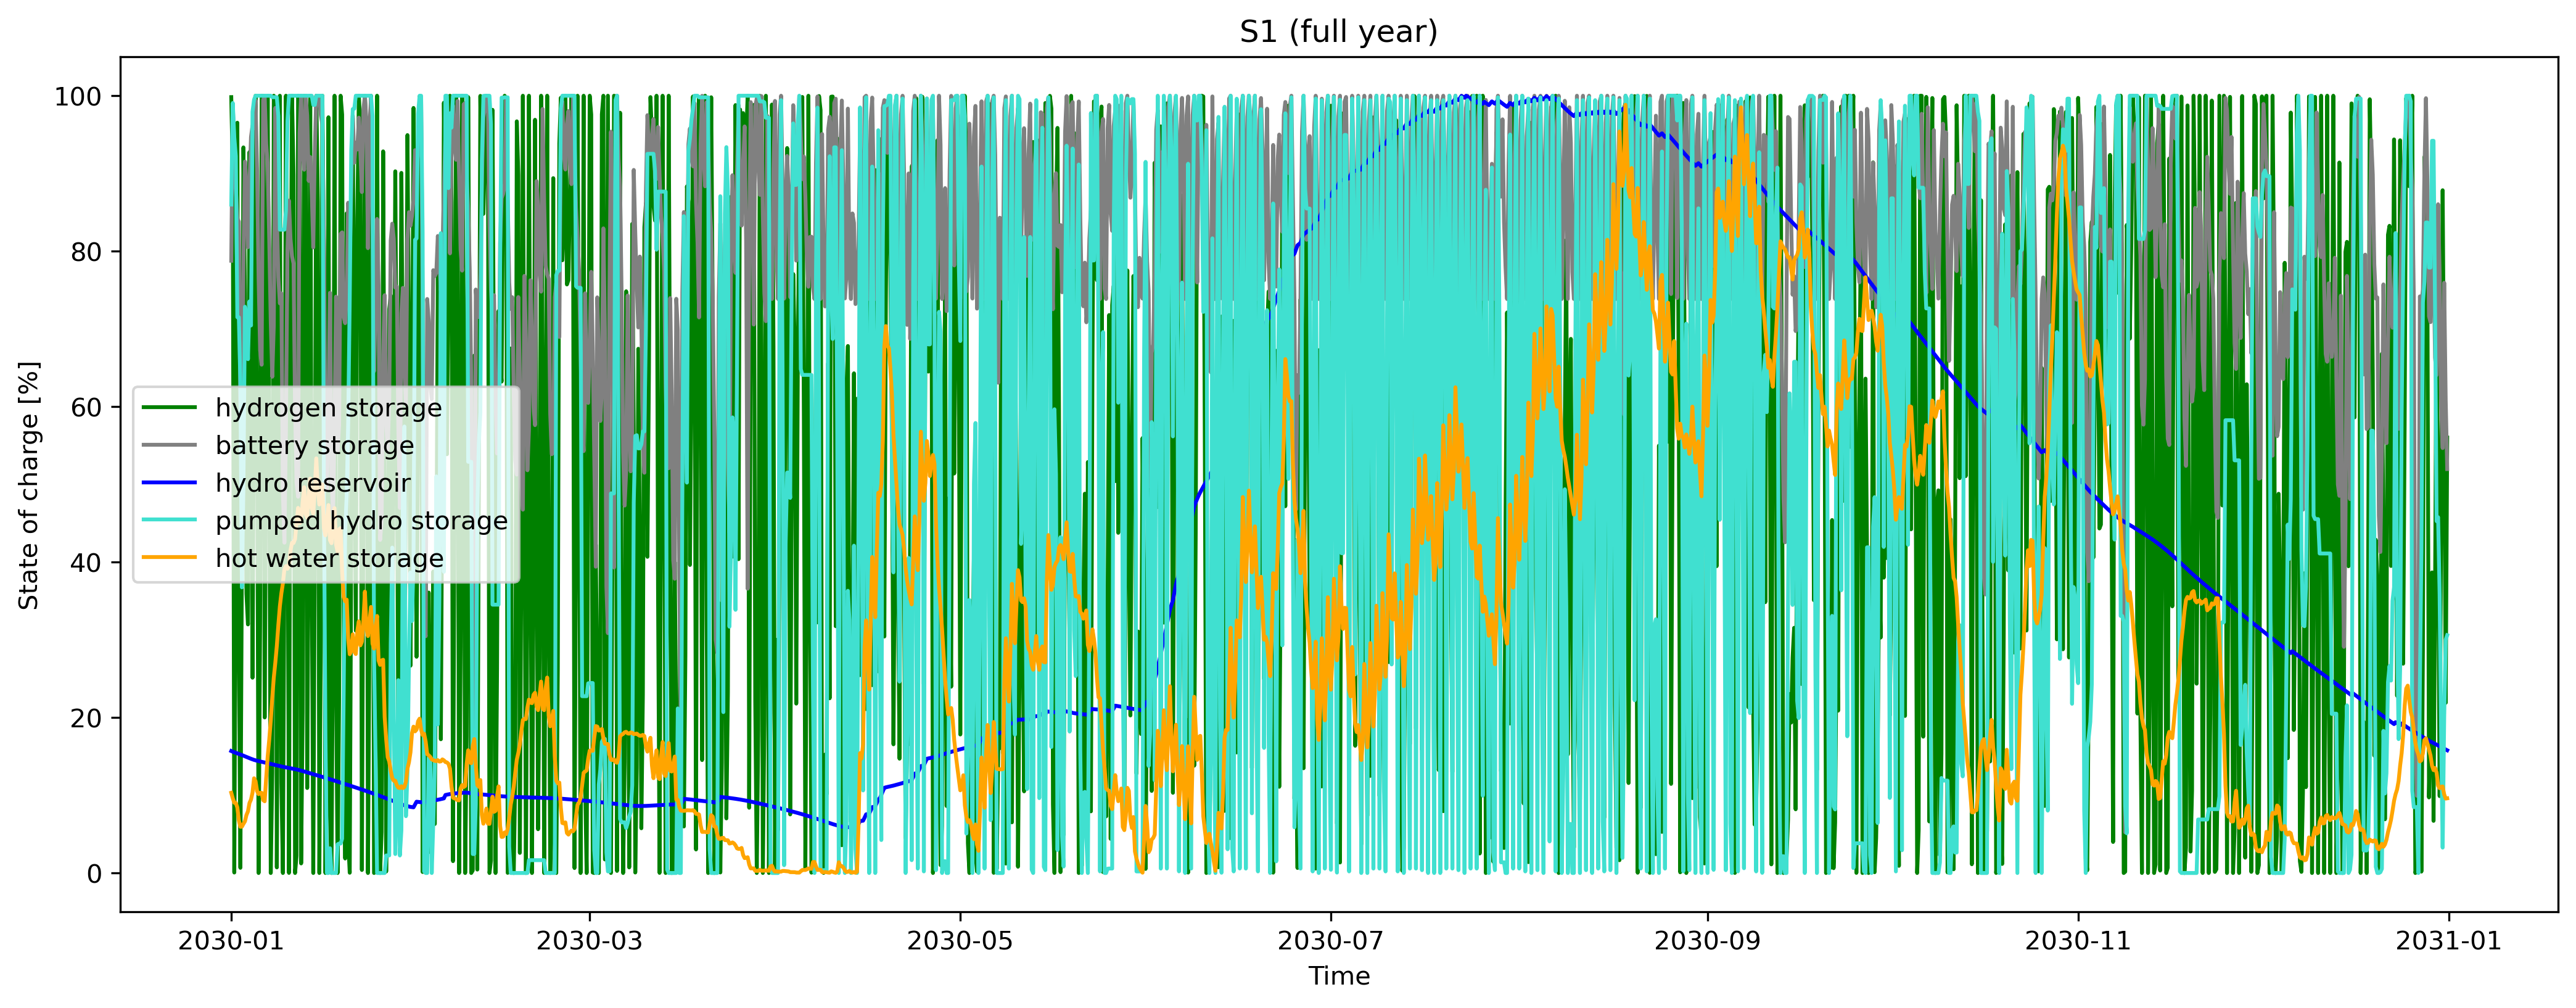

In [17]:
plt.figure(figsize=(17, 6),dpi=300)
plt.plot(ts2["h2 SOC [%]"], color="green", label="hydrogen storage")
plt.plot(ts2["battery SOC [%]"], color="grey", label="battery storage")
plt.plot(ts2["hydro SOC [%]"], color="blue", label="hydro reservoir")
plt.plot(ts2["PHS SOC [%]"], color="turquoise", label="pumped hydro storage")
plt.plot(ts2["hot water SOC [%]"], color="orange", label="hot water storage")
#plt.fill_between(ts2["deficit [GW]"].loc["2030-01"].index, ts2["load [GW]"].loc["2030-01"], ts2["RE"].loc["2030-01"], color="grey", label="deficit")
#plt.fill_between(ts2.index, ts2["load [TW]"].loc["2013-01"], ts2["RE"].loc["2013-01"], color="grey", label="deficit")

plt.xlabel("Time")
plt.ylabel("State of charge [%]")
plt.title("S1 (full year)")
plt.legend()
plt.show()

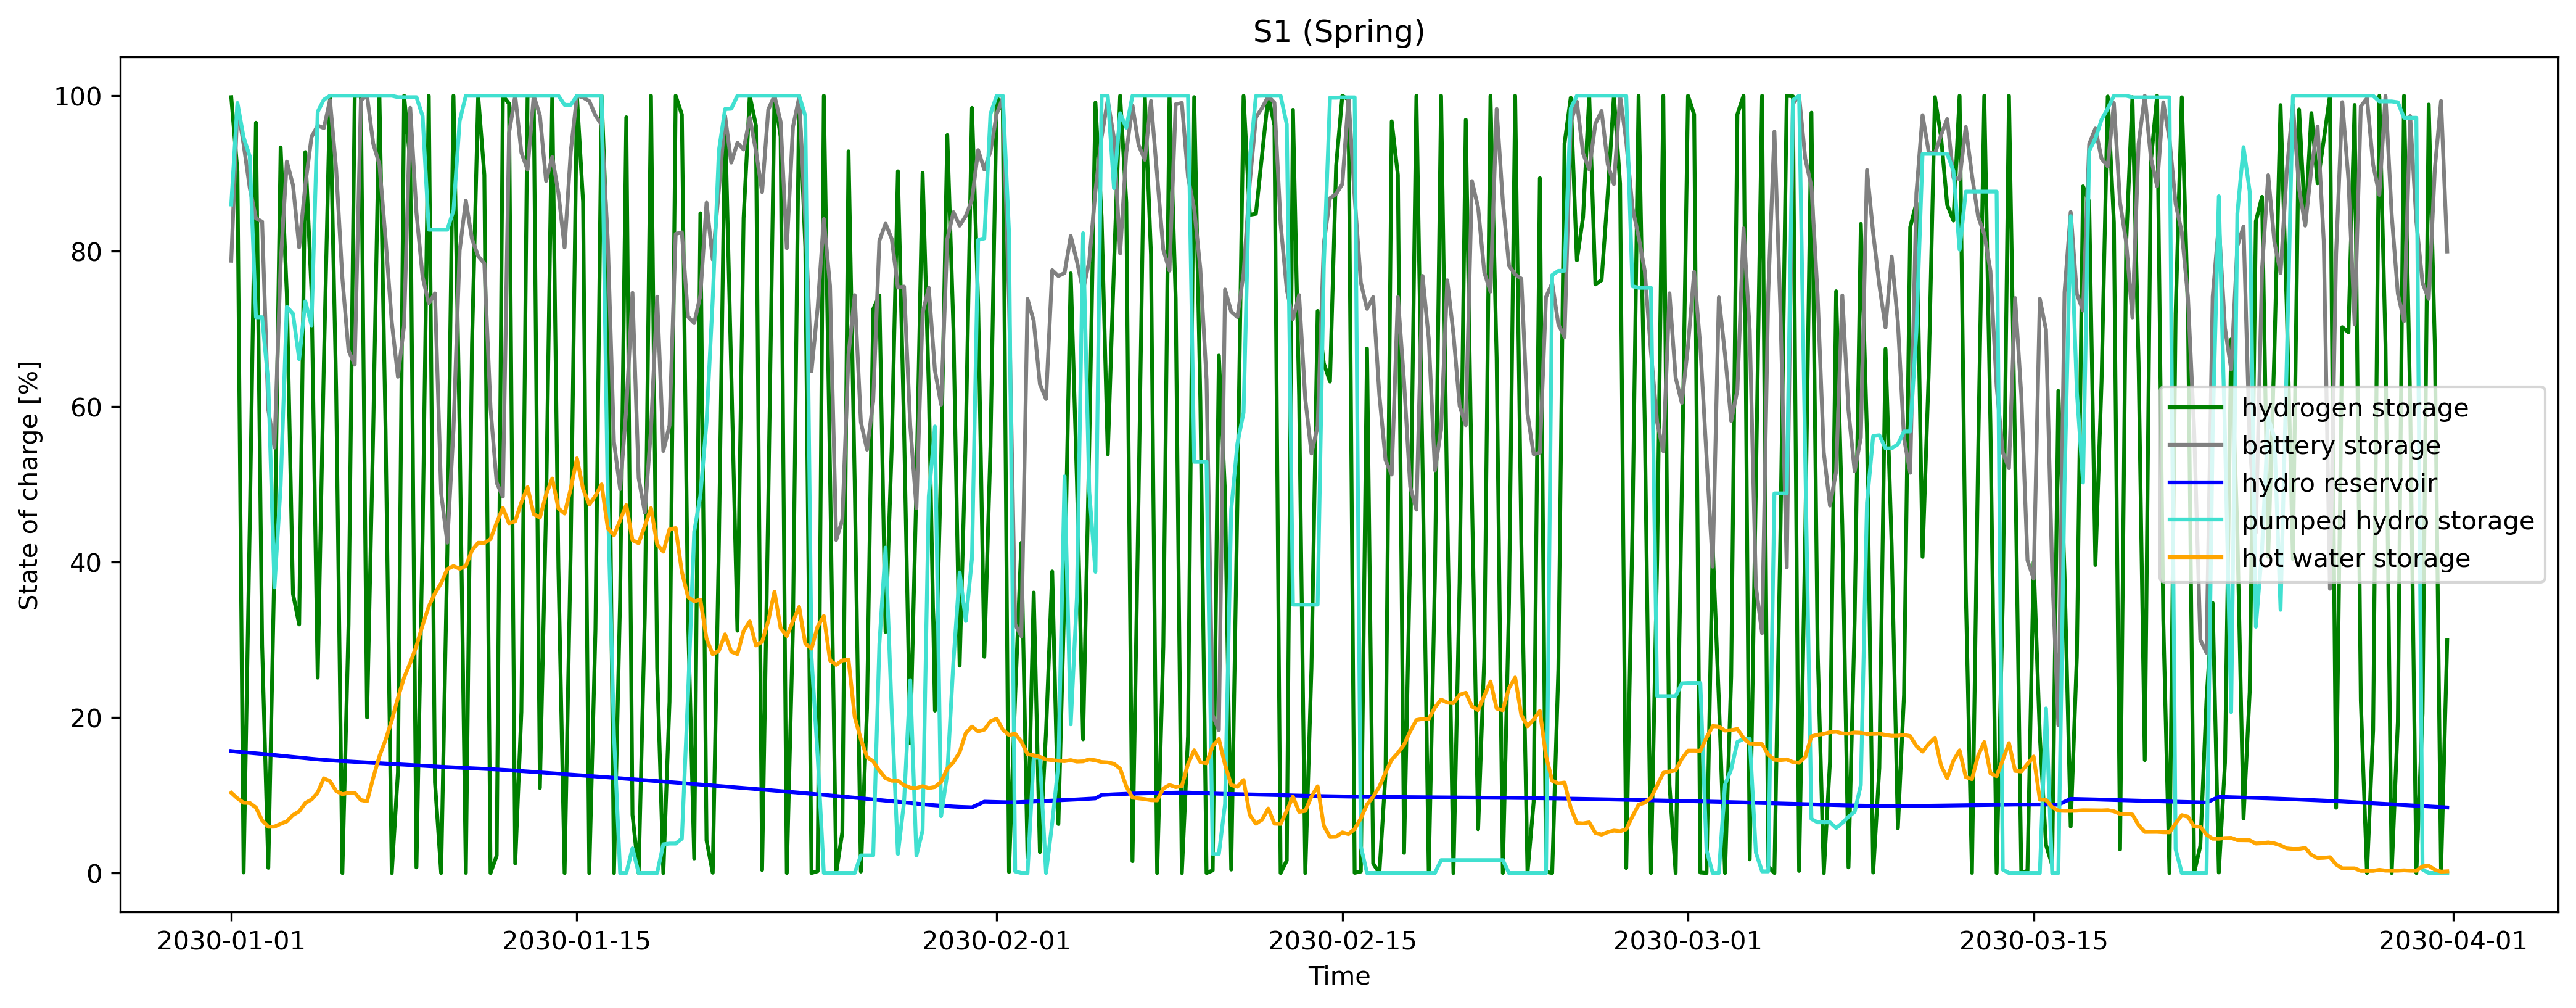

In [19]:
plt.figure(figsize=(17, 6),dpi=300)
plt.plot(ts2["h2 SOC [%]"].loc["2030-01":"2030-03"], color="green", label="hydrogen storage")
plt.plot(ts2["battery SOC [%]"].loc["2030-01":"2030-03"], color="grey", label="battery storage")
plt.plot(ts2["hydro SOC [%]"].loc["2030-01":"2030-03"], color="blue", label="hydro reservoir")
plt.plot(ts2["PHS SOC [%]"].loc["2030-01":"2030-03"], color="turquoise", label="pumped hydro storage")
plt.plot(ts2["hot water SOC [%]"].loc["2030-01":"2030-03"], color="orange", label="hot water storage")
#plt.fill_between(ts2["deficit [GW]"].loc["2030-01"].index, ts2["load [GW]"].loc["2030-01"], ts2["RE"].loc["2030-01"], color="grey", label="deficit")
#plt.fill_between(ts2.index, ts2["load [TW]"].loc["2013-01"], ts2["RE"].loc["2013-01"], color="grey", label="deficit")

plt.xlabel("Time")
plt.ylabel("State of charge [%]")
plt.title("S1 (Spring)")
plt.legend()
plt.show()

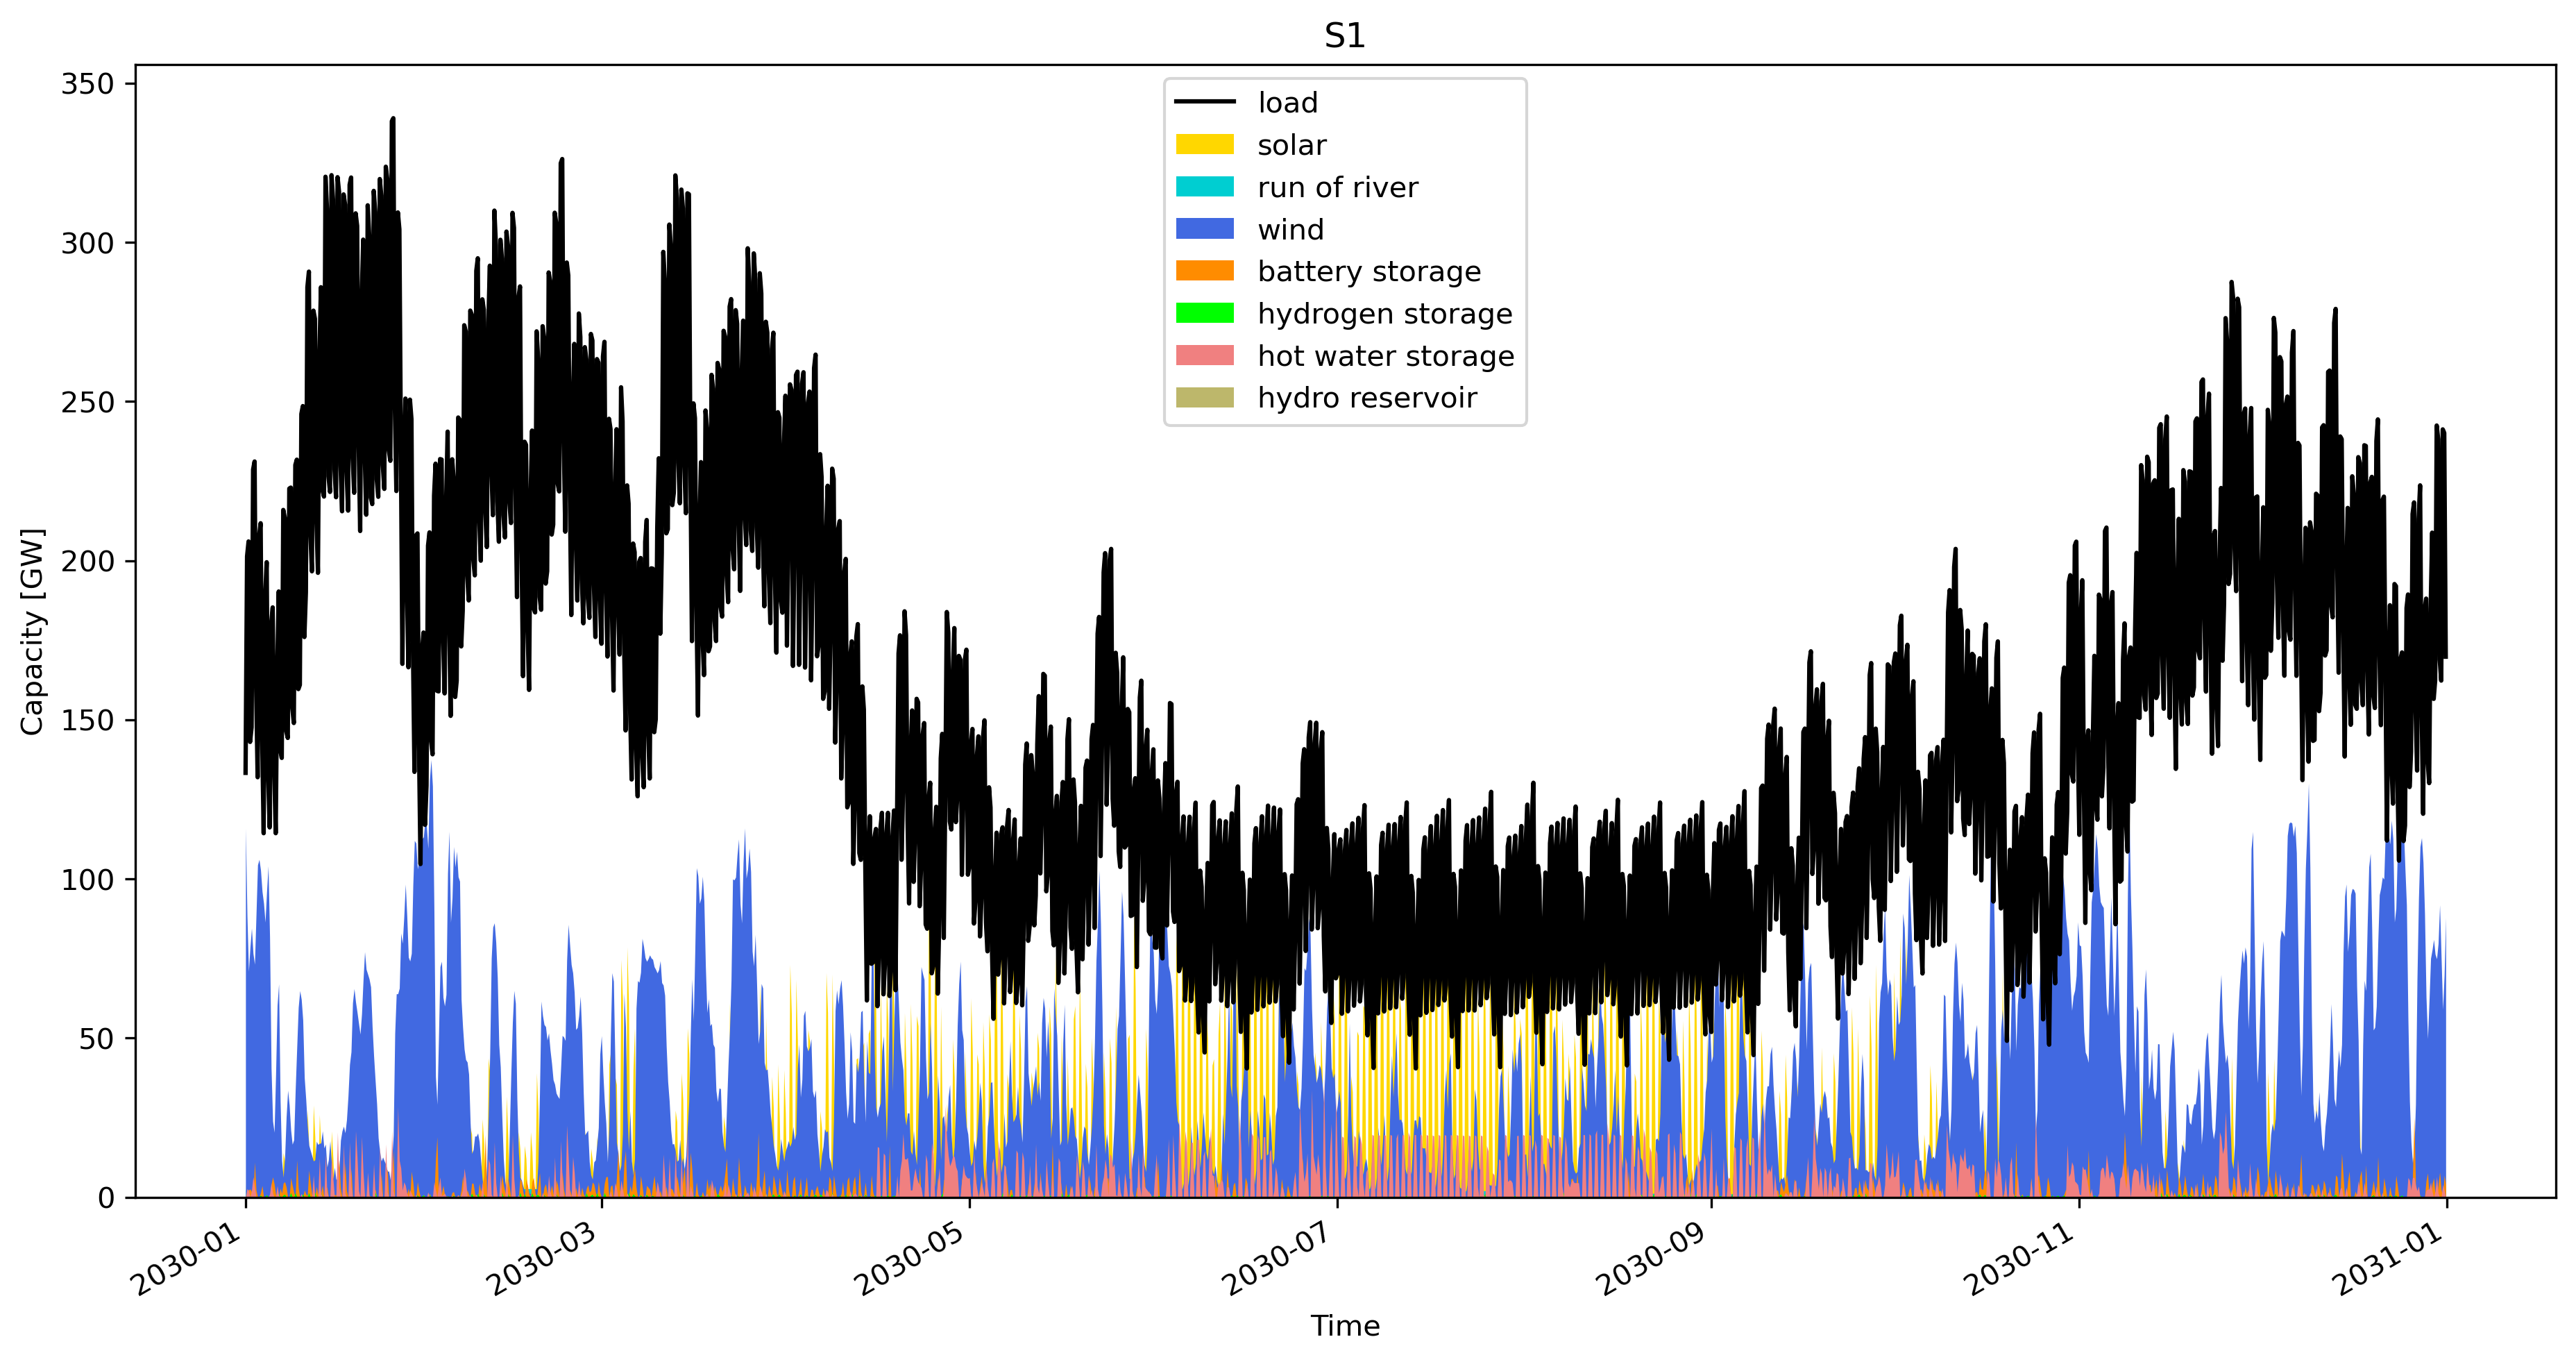

In [20]:
fig, ax = plt.subplots(figsize=(15, 8),dpi=300)
plt.plot(ts2["load [GW]"], color="black", label="load")
ts2["solar [GW]"].plot.area(ax=ax,linewidth=0,color="gold",label="solar")
ts2["ror [GW]"].plot.area(ax=ax,linewidth=0,color="darkturquoise",label="run of river")
ts2["wind [GW]"].plot.area(ax=ax,linewidth=0,color="royalblue",label="wind")
ts2["battery dispatch [GW]"].where(ts2["battery dispatch [GW]"]>0).plot.area(ax=ax,linewidth=0,color="darkorange",label="battery storage")
ts2["h2 dispatch [GW]"].where(ts2["h2 dispatch [GW]"]>0).plot.area(ax=ax,linewidth=0,color="lime",label="hydrogen storage")
ts2["hot water disptach [GW]"].where(ts2["hot water disptach [GW]"]>0).plot.area(ax=ax,linewidth=0,color="lightcoral",label="hot water storage")
ts2["hydro disptach [GW]"].where(ts2["hydro disptach [GW]"]>0).plot.area(ax=ax,linewidth=0,color="darkkhaki",label="hydro reservoir")
#ts2["PHS disptach [GW]"].where(ts2["PHS disptach [GW]"]>0).plot.area(ax=ax,linewidth=0,color="darkkhaki",label="pumped hydro storage")


#plt.plot(ts2["load [GW]"], color="black", label="load")

plt.xlabel("Time")
plt.ylabel("Capacity [GW]")
plt.title("S1")
plt.legend()
plt.show()

In [10]:
fossil_oil = n1.snapshot_weightings.generators @ n1.generators_t.p.loc[
        :, "EU oil"
    ].div(1e6)
fossil_oil

4007.868101568237

In [23]:
sab1 = n1.links_t.p0.filter(regex='^DE.*Sabatier$').sum(axis=1) # MW
sab1.index = pd.to_datetime(sab1.index)
sab1.index = sab1.index.map(lambda dt: dt.replace(year=2030))
#pct3_home_battery = sab3/(0.638464)*100
#pct3_home_battery = pct3_home_battery.to_frame(name="FNB")
sab1.sum()

7.131573936112998

In [24]:
ft1 = n1.links_t.p0.filter(regex='^DE.*Fischer-Tropsch$').sum(axis=1) # MW
ft1.index = pd.to_datetime(ft1.index)
ft1.index = ft1.index.map(lambda dt: dt.replace(year=2030))
#pct3_home_battery = sab3/(0.638464)*100
#pct3_home_battery = pct3_home_battery.to_frame(name="FNB")
ft1.sum()

28.11427890632835

In [25]:
fc1 = n1.links_t.p0.filter(regex='^DE.*H2 Fuel Cell$').sum(axis=1) # MW
fc1.index = pd.to_datetime(fc1.index)
fc1.index = fc1.index.map(lambda dt: dt.replace(year=2030))
#pct3_home_battery = sab3/(0.638464)*100
#pct3_home_battery = pct3_home_battery.to_frame(name="FNB")
fc1.sum()

11.628002294773442